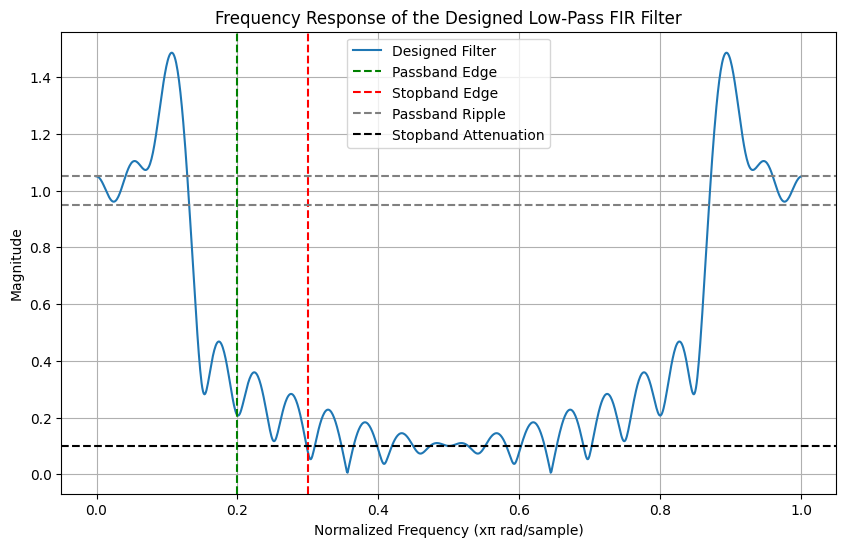

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

# Specifications
fp = 0.2  # Passband frequency (normalized)
fs = 0.3  # Stopband frequency (normalized)
delta_p = 0.05  # Passband ripple
delta_s = 0.1  # Stopband attenuation
N = 20  # Filter order

# Frequency grid
omega = np.linspace(0, np.pi, 1000)

# Desired frequency response
Hd = np.where(omega <= fp * np.pi, 1, 0)

# Optimization variable
h = cp.Variable(N + 1)

# Frequency response H(e^jw) using cosine terms (real part only)
H_real = cp.sum([h[n] * np.cos(n * omega) for n in range(N + 1)], axis=0)

# Constraints
passband_indices = omega <= fp * np.pi
stopband_indices = omega >= fs * np.pi

passband_constraint = cp.abs(H_real[passband_indices] - 1) <= delta_p
stopband_constraint = cp.abs(H_real[stopband_indices]) <= delta_s

# Objective: Minimize maximum deviation
objective = cp.Minimize(cp.max(cp.abs(H_real - Hd)))

# Problem formulation
problem = cp.Problem(objective, [passband_constraint, stopband_constraint])

# Solve the problem
problem.solve()

# Extract the optimized filter coefficients
h_opt = h.value

# Frequency response of the designed filter
w = np.linspace(0, np.pi, 1000)
H_opt = np.fft.fft(h_opt, 1000)

# Plot the magnitude response
plt.figure(figsize=(10, 6))
plt.plot(w / np.pi, np.abs(H_opt), label='Designed Filter')
plt.axvline(fp, color='green', linestyle='--', label='Passband Edge')
plt.axvline(fs, color='red', linestyle='--', label='Stopband Edge')
plt.axhline(1 + delta_p, color='gray', linestyle='--', label='Passband Ripple')
plt.axhline(1 - delta_p, color='gray', linestyle='--')
plt.axhline(delta_s, color='black', linestyle='--', label='Stopband Attenuation')
plt.xlabel('Normalized Frequency (x\u03c0 rad/sample)')
plt.ylabel('Magnitude')
plt.title('Frequency Response of the Designed Low-Pass FIR Filter')
plt.legend()
plt.grid(True)
plt.show()


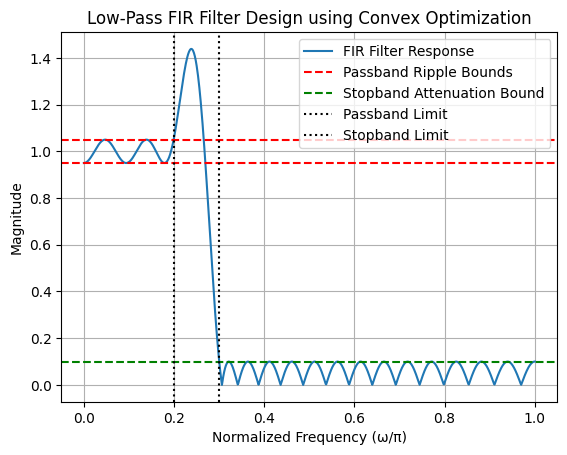

In [15]:
# Final
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

N = 20
fp = 0.2
fs = 0.3
delta_p = 0.05
delta_s = 0.1

omega = np.linspace(0, np.pi, 1000)
passband_indices = omega <= fp * np.pi
stopband_indices = omega >= fs * np.pi

h = cp.Variable(N + 1)

H = cp.real(cp.sum([h[n] * np.exp(-1j * omega * n) for n in range(N + 1)], axis=0))

Hd = np.ones_like(omega)
Hd[stopband_indices] = 0

objective = cp.Minimize(cp.max(cp.abs(H - Hd)))

constraints = [
    cp.abs(H[passband_indices] - 1) <= delta_p,
    cp.abs(H[stopband_indices]) <= delta_s,
]

problem = cp.Problem(objective, constraints)
problem.solve()

plt.plot(omega / np.pi, np.abs(H.value), label='FIR Filter Response')
plt.axhline(1 + delta_p, color='red', linestyle='--', label='Passband Ripple Bounds')
plt.axhline(1 - delta_p, color='red', linestyle='--')
plt.axhline(delta_s, color='green', linestyle='--', label='Stopband Attenuation Bound')
plt.axvline(fp, color='black', linestyle=':', label='Passband Limit')
plt.axvline(fs, color='black', linestyle=':', label='Stopband Limit')
plt.title("Low-Pass FIR Filter Design using Convex Optimization")
plt.xlabel("Normalized Frequency (ω/π)")
plt.ylabel("Magnitude")
plt.legend()
plt.grid()
plt.show()


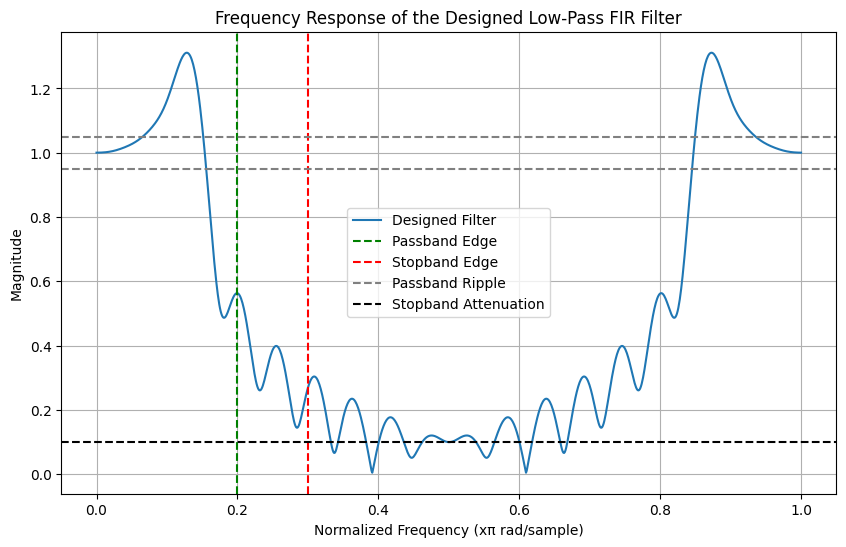

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

# Specifications
fp = 0.2  # Passband frequency (normalized)
fs = 0.3  # Stopband frequency (normalized)
delta_p = 0.05  # Passband ripple
delta_s = 0.1  # Stopband attenuation
N = 20  # Filter order

# Frequency grid for optimization
omega_passband = np.linspace(0, fp * np.pi, 500)  # Passband frequencies
omega_stopband = np.linspace(fs * np.pi, np.pi, 500)  # Stopband frequencies

# Desired frequency response (1 for passband, 0 for stopband)
Hd_passband = np.ones_like(omega_passband)
Hd_stopband = np.zeros_like(omega_stopband)

# Optimization variable
h = cp.Variable(N + 1)

# Frequency response H(e^jw) for passband and stopband (real part using cosine terms)
H_passband = cp.sum([h[n] * np.cos(n * omega_passband) for n in range(N + 1)], axis=0)
H_stopband = cp.sum([h[n] * np.cos(n * omega_stopband) for n in range(N + 1)], axis=0)

# Constraints for passband and stopband
passband_constraint = cp.abs(H_passband - Hd_passband) <= delta_p
stopband_constraint = cp.abs(H_stopband) <= delta_s

# Objective: Minimize maximum deviation in the frequency response
objective = cp.Minimize(cp.max(cp.abs(H_passband - Hd_passband)))

# Problem formulation
problem = cp.Problem(objective, [passband_constraint, stopband_constraint])

# Solve the problem
problem.solve()

# Extract the optimized filter coefficients
h_opt = h.value

# Frequency response of the designed filter
w = np.linspace(0, np.pi, 1000)
H_opt = np.fft.fft(h_opt, 1000)

# Plot the magnitude response
plt.figure(figsize=(10, 6))
plt.plot(w / np.pi, np.abs(H_opt[:len(w)]), label='Designed Filter')
plt.axvline(fp, color='green', linestyle='--', label='Passband Edge')
plt.axvline(fs, color='red', linestyle='--', label='Stopband Edge')
plt.axhline(1 + delta_p, color='gray', linestyle='--', label='Passband Ripple')
plt.axhline(1 - delta_p, color='gray', linestyle='--')
plt.axhline(delta_s, color='black', linestyle='--', label='Stopband Attenuation')
plt.xlabel('Normalized Frequency (x\u03c0 rad/sample)')
plt.ylabel('Magnitude')
plt.title('Frequency Response of the Designed Low-Pass FIR Filter')
plt.legend()
plt.grid(True)
plt.show()


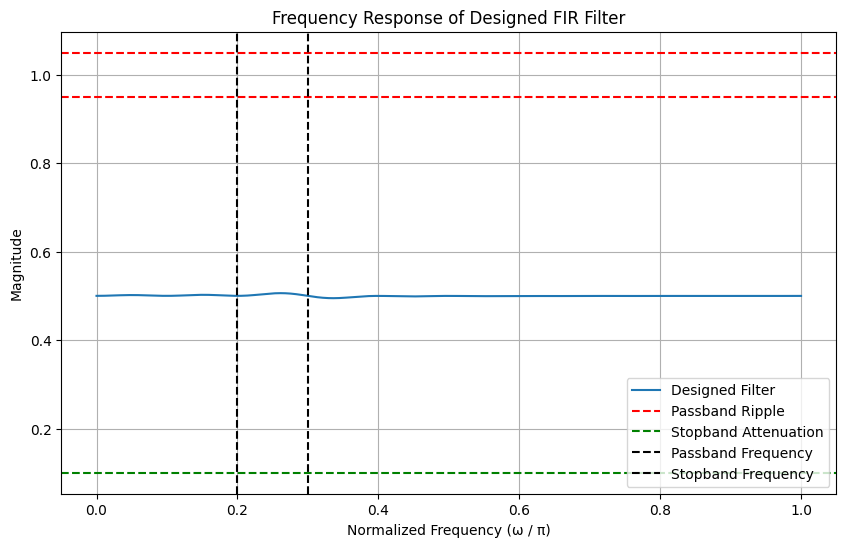

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

# Specifications
fp = 0.2  # Passband frequency (normalized)
fs = 0.3  # Stopband frequency (normalized)
passband_ripple = 0.05  # Passband ripple
stopband_attenuation = 0.1  # Stopband attenuation
N = 20  # Filter order


num_points = 1000  # Number of frequency points for evaluation
omega = np.linspace(0, np.pi, num_points)

h = cp.Variable(N + 1)  # Filter coefficients h[n], n = 0, 1, ..., N

# Compute the matrix for frequency response
exp_matrix = np.exp(-1j * np.outer(omega, np.arange(N + 1)))
H = exp_matrix @ h

# Find the indices corresponding to the passband and stopband frequencies
passband_idx = int(fp * num_points)
stopband_idx = int(fs * num_points)

# Desired frequency response: 1 in the passband, 0 in the stopband
Hd = np.ones(num_points)
Hd[stopband_idx:] = 0


# Objective: Minimize maximum deviation
deviation = cp.abs(H - Hd)
objective = cp.Minimize(cp.max(deviation))

# Solve the optimization problem
problem = cp.Problem(objective)
problem.solve()

plt.figure(figsize=(10, 6))
plt.plot(omega / np.pi, np.abs(H.value), label='Designed Filter')
plt.axhline(1 + passband_ripple, color='red', linestyle='--', label='Passband Ripple')
plt.axhline(1 - passband_ripple, color='red', linestyle='--')
plt.axhline(stopband_attenuation, color='green', linestyle='--', label='Stopband Attenuation')
plt.axvline(fp, color='black', linestyle='--', label='Passband Frequency')
plt.axvline(fs, color='black', linestyle='--', label='Stopband Frequency')
plt.xlabel('Normalized Frequency (ω / π)')
plt.ylabel('Magnitude')
plt.title('Frequency Response of Designed FIR Filter')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

def freq_response(h_coeff, num_pts=512):
    """
    Compute the frequency response H(e^{jw}) for w in [0, pi].
    Returns (omega, mag) for plotting.
    """
    w_vals = np.linspace(0, np.pi, num_pts)
    H_vals = np.zeros(num_pts, dtype=complex)
    
    for i, w in enumerate(w_vals):
        real_part = 0
        imag_part = 0
        for n in range(len(h_coeff)):
            real_part += h_coeff[n] * np.cos(n*w)
            imag_part -= h_coeff[n] * np.sin(n*w)
        H_vals[i] = real_part + 1j * imag_part
    
    return w_vals, np.abs(H_vals)

# ===========================================================================
# 1. Filter Specifications
# ===========================================================================
N = 20           # Filter order
fp = 0.2         # Passband cutoff (normalized)
fs = 0.3         # Stopband start   (normalized)
delta_p = 0.05   # Passband ripple
delta_s = 0.1    # Stopband attenuation

# Frequency grid
M = 200
omega_grid = np.linspace(0, np.pi, M)

# ===========================================================================
# 2. Define Optimization Variables
# ===========================================================================
h = cp.Variable(N + 1)

# ===========================================================================
# 3. Build Constraints
# ===========================================================================
constraints = []
for w in omega_grid:
    # Real and Imag parts of H(e^{j w})
    real_part = 0
    imag_part = 0
    for n in range(N + 1):
        real_part += h[n] * np.cos(n * w)
        imag_part -= h[n] * np.sin(n * w)
    
    if w <= fp * np.pi:
        # Passband constraint: |H(e^{jw}) - 1| <= delta_p
        constraints.append(
            cp.norm2(cp.hstack([real_part - 1, imag_part])) <= delta_p
        )
    elif w >= fs * np.pi:
        # Stopband constraint: |H(e^{jw})| <= delta_s
        constraints.append(
            cp.norm2(cp.hstack([real_part, imag_part])) <= delta_s
        )

# ===========================================================================
# 4. Objective: Minimize norm of coefficients (as an example)
# ===========================================================================
obj = cp.Minimize(cp.norm2(h))
problem = cp.Problem(obj, constraints)
result = problem.solve(verbose=False)

# ===========================================================================
# 5. Report & Plot
# ===========================================================================
print("Optimization status:", problem.status)
print("Objective value (||h||2):", problem.value)
h_opt = h.value

# Frequency response of designed filter
w_plot, H_mag = freq_response(h_opt, num_pts=1024)

plt.figure(figsize=(8,4))
plt.plot(w_plot/np.pi, H_mag, label='|H(e^{jω})|')
plt.axvline(fp, color='green', linestyle='--', label='fp=0.2')
plt.axvline(fs, color='red', linestyle='--', label='fs=0.3')
plt.ylim([0, 1.2])
plt.title("Designed FIR Low-Pass Filter (Order=20)")
plt.xlabel("Normalized Frequency (×π rad/sample)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.legend()
plt.show()


Optimization status: infeasible
Objective value (||h||2): inf


TypeError: object of type 'NoneType' has no len()